<a href="https://colab.research.google.com/github/PriyamShah1/run/blob/master/Driving_Simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/PriyamShah1/run

Cloning into 'run'...
remote: Enumerating objects: 11510, done.
remote: Counting objects: 100% (11510/11510), done.
remote: Compressing objects: 100% (11510/11510), done.
remote: Total 11510 (delta 2), reused 11508 (delta 0), pack-reused 0
Receiving objects: 100% (11510/11510), 166.81 MiB | 30.25 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Checking out files: 100% (11503/11503), done.


In [2]:
ls run

driving_log.csv  IMG/


In [3]:

!pip3 install imgaug
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import ntpath
import random

ls: cannot access 'track': No such file or directory


Using TensorFlow backend.


In [4]:
datadir = 'run'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', -1)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\priya\Documents\Data\IMG\center_2019_01_13_15_22_37_699.jpg,C:\Users\priya\Documents\Data\IMG\left_2019_01_13_15_22_37_699.jpg,C:\Users\priya\Documents\Data\IMG\right_2019_01_13_15_22_37_699.jpg,0.0,0.0,0,0.000078
1,C:\Users\priya\Documents\Data\IMG\center_2019_01_13_15_22_37_801.jpg,C:\Users\priya\Documents\Data\IMG\left_2019_01_13_15_22_37_801.jpg,C:\Users\priya\Documents\Data\IMG\right_2019_01_13_15_22_37_801.jpg,0.0,0.0,0,0.000078
2,C:\Users\priya\Documents\Data\IMG\center_2019_01_13_15_22_37_904.jpg,C:\Users\priya\Documents\Data\IMG\left_2019_01_13_15_22_37_904.jpg,C:\Users\priya\Documents\Data\IMG\right_2019_01_13_15_22_37_904.jpg,0.0,0.0,0,0.000078
3,C:\Users\priya\Documents\Data\IMG\center_2019_01_13_15_22_38_006.jpg,C:\Users\priya\Documents\Data\IMG\left_2019_01_13_15_22_38_006.jpg,C:\Users\priya\Documents\Data\IMG\right_2019_01_13_15_22_38_006.jpg,0.0,0.0,0,0.000078
4,C:\Users\priya\Documents\Data\IMG\center_2019_01_13_15_22_38_112.jpg,C:\Users\priya\Documents\Data\IMG\left_2019_01_13_15_22_38_112.jpg,C:\Users\priya\Documents\Data\IMG\right_2019_01_13_15_22_38_112.jpg,0.0,0.0,0,0.000079


In [5]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail

data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()



,center,left,right,steering,throttle,reverse,speed
0,center_2019_01_13_15_22_37_699.jpg,left_2019_01_13_15_22_37_699.jpg,right_2019_01_13_15_22_37_699.jpg,0.0,0.0,0,0.000078
1,center_2019_01_13_15_22_37_801.jpg,left_2019_01_13_15_22_37_801.jpg,right_2019_01_13_15_22_37_801.jpg,0.0,0.0,0,0.000078
2,center_2019_01_13_15_22_37_904.jpg,left_2019_01_13_15_22_37_904.jpg,right_2019_01_13_15_22_37_904.jpg,0.0,0.0,0,0.000078
3,center_2019_01_13_15_22_38_006.jpg,left_2019_01_13_15_22_38_006.jpg,right_2019_01_13_15_22_38_006.jpg,0.0,0.0,0,0.000078
4,center_2019_01_13_15_22_38_112.jpg,left_2019_01_13_15_22_38_112.jpg,right_2019_01_13_15_22_38_112.jpg,0.0,0.0,0,0.000079


<Container object of 10 artists>

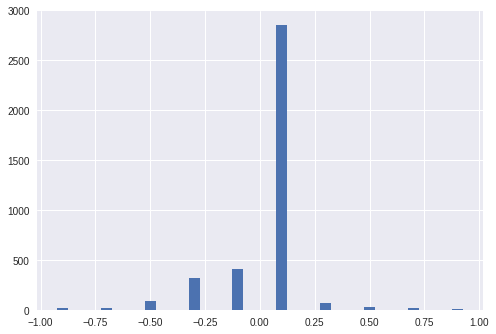

In [6]:
num_bins = 25
samples_per_bin = 400
hist, bins = np.histogram(data['steering'])
center = (bins[:-1] + bins[1:])*.5
plt.bar(center,hist,width = .05)


In [8]:
print('total data:', len(data))
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)
 
print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))
 
hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

total data: 3834


IndexError: ignored